In [1]:
from microstructpy.markets.continuous import ContinuousDoubleAuction
from microstructpy.traders.market_maker import *
from microstructpy.traders.informed import *
from microstructpy.traders.noise import *

from microstructpy.visualization.summary import participant_comparison, price_path
from microstructpy.metrics.trader import participants_report

In [2]:
market   = ContinuousDoubleAuction(initial_fair_price=1000)
mm       = KyleMarketMaker(market)
informed = TWAPInformedTrader(market)
noise    = NoiseTrader(market, submission_rate=1, volume_size=lambda:np.random.randint(5, 20))

market.run(300)

100%|██████████| 300/300 [00:00<00:00, 5935.70it/s]


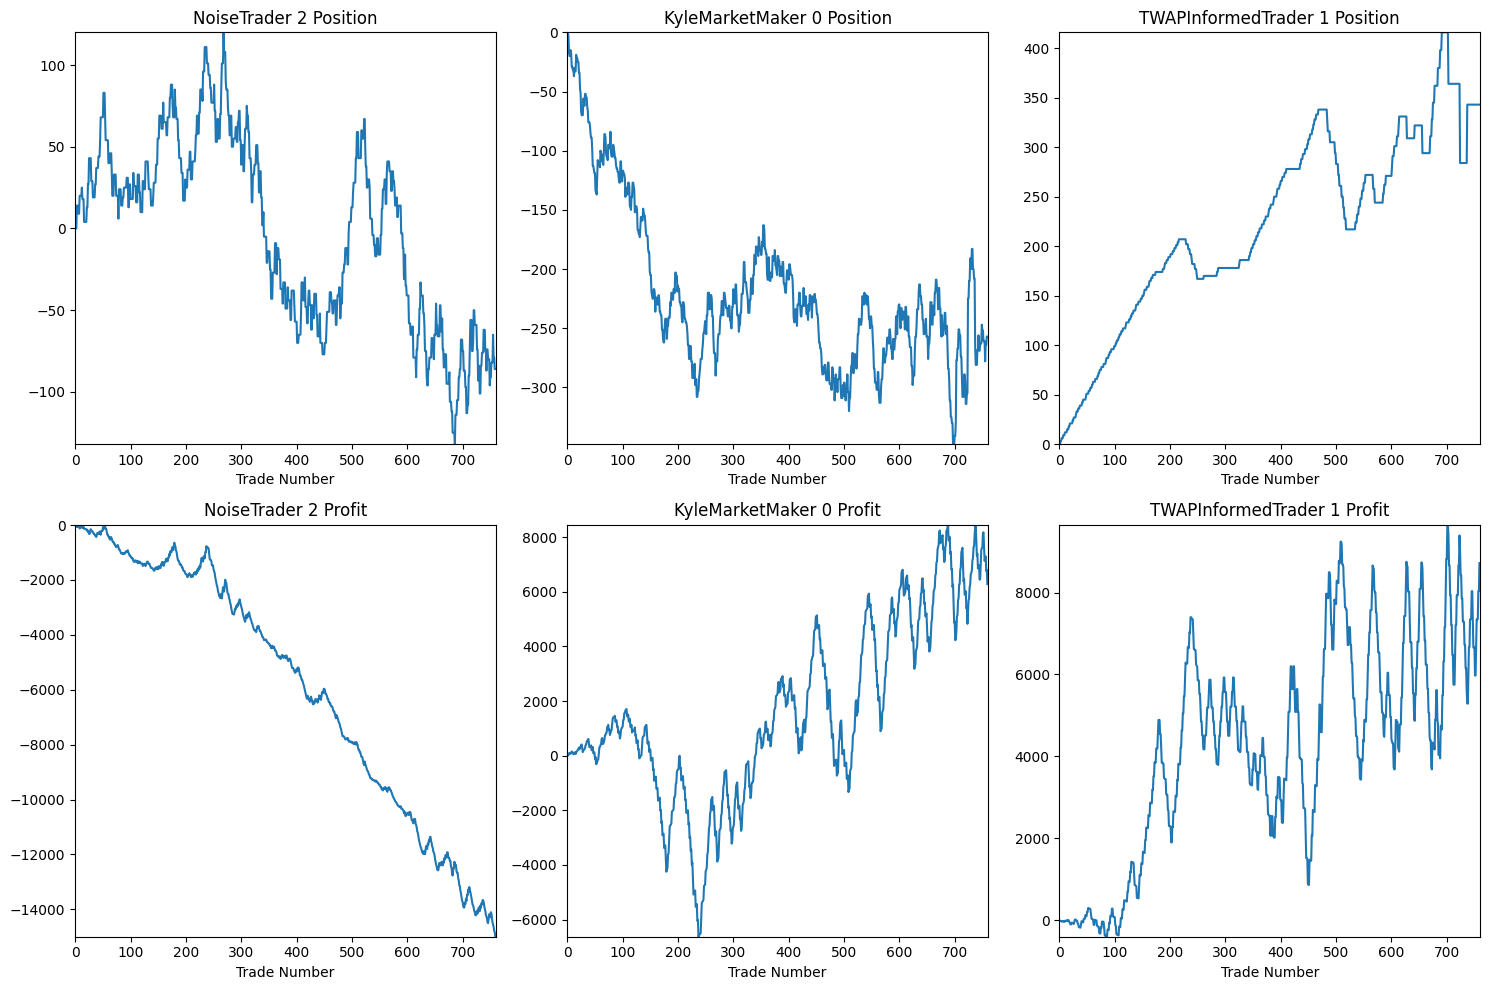

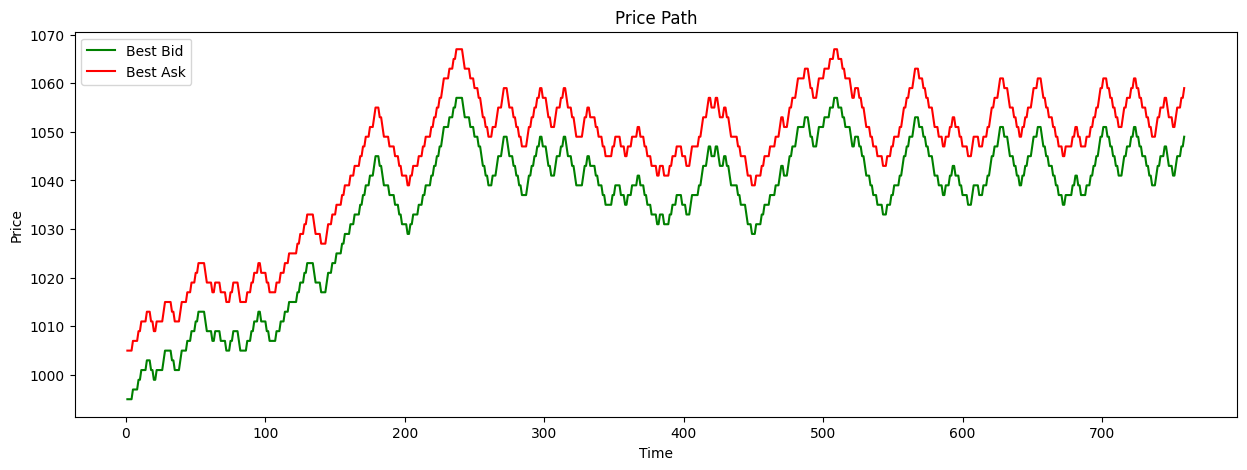

In [3]:
participant_comparison(market.participants)
price_path(market)

In [5]:
participants_report(market.participants)

,NoiseTrader_2,KyleMarketMaker_0,TWAPInformedTrader_1
final_profit,-15000.00,6281.00,8719.00
final_position,-86.00,-257.00,343.00
profit_per_state,-19.76,8.28,11.49
std_profit_per_state,80.07,296.99,309.95
information_ratio,-0.25,0.03,0.04
total_trades,300.00,459.00,159.00
volume_traded,3556.00,4641.00,1085.00
profit_per_volume,-4.22,1.35,8.04
average_trade_size,11.85,10.11,6.82
fill_rate,1.00,0.08,1.00


In [6]:
df = participants_report(market.participants)
print(df.to_markdown())

|                      |   NoiseTrader_2 |   KyleMarketMaker_0 |   TWAPInformedTrader_1 |
|:---------------------|----------------:|--------------------:|-----------------------:|
| final_profit         |       -15000    |             6281    |                8719    |
| final_position       |          -86    |             -257    |                 343    |
| profit_per_state     |          -19.76 |                8.28 |                  11.49 |
| std_profit_per_state |           80.07 |              296.99 |                 309.95 |
| information_ratio    |           -0.25 |                0.03 |                   0.04 |
| total_trades         |          300    |              459    |                 159    |
| volume_traded        |         3556    |             4641    |                1085    |
| profit_per_volume    |           -4.22 |                1.35 |                   8.04 |
| average_trade_size   |           11.85 |               10.11 |                   6.82 |
| fill_rat